In [1]:
import pandas as pd


In [13]:
from google.colab import files
uploaded = files.upload()  # Use this in Google Colab


Saving hr_sample_eda.csv to hr_sample_eda.csv


In [14]:
df = pd.read_csv("hr_sample_eda.csv")


In [15]:
df.head()

,EmployeeID,Age,Department,JobRole,Gender,Education,JobSatisfaction,EnvironmentSatisfaction,Attrition
0,101,29,Sales,Executive,Male,3,4,3,No
1,102,35,HR,Manager,Female,4,3,4,Yes
2,103,40,IT,Developer,Male,2,2,2,Yes
3,104,28,Sales,Executive,Female,3,4,4,No
4,105,50,Finance,Analyst,Male,5,1,1,Yes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               10 non-null     int64 
 1   Age                      10 non-null     int64 
 2   Department               10 non-null     object
 3   JobRole                  10 non-null     object
 4   Gender                   10 non-null     object
 5   Education                10 non-null     int64 
 6   JobSatisfaction          10 non-null     int64 
 7   EnvironmentSatisfaction  10 non-null     int64 
 8   Attrition                10 non-null     object
dtypes: int64(5), object(4)
memory usage: 852.0+ bytes


In [17]:
df.describe(include='all')

,EmployeeID,Age,Department,JobRole,Gender,Education,JobSatisfaction,EnvironmentSatisfaction,Attrition
count,10.00000,10.000000,10,10,10,10.000000,10.000000,10.000000,10
unique,NaN,NaN,4,4,2,NaN,NaN,NaN,2
top,NaN,NaN,Sales,Executive,Male,NaN,NaN,NaN,No
freq,NaN,NaN,3,4,5,NaN,NaN,NaN,5
mean,105.50000,36.900000,NaN,NaN,NaN,3.300000,2.700000,2.600000,NaN
std,3.02765,7.340148,NaN,NaN,NaN,1.159502,1.159502,1.074968,NaN
min,101.00000,28.000000,NaN,NaN,NaN,2.000000,1.000000,1.000000,NaN
25%,103.25000,30.500000,NaN,NaN,NaN,2.250000,2.000000,2.000000,NaN
50%,105.50000,37.000000,NaN,NaN,NaN,3.000000,3.000000,3.000000,NaN
75%,107.75000,40.750000,NaN,NaN,NaN,4.000000,3.750000,3.000000,NaN


In [18]:
df['Department'].value_counts()

,count
Department,
Sales,3
IT,3
HR,2
Finance,2


In [19]:
df['Gender'].value_counts()

,count
Gender,
Male,5
Female,5


In [21]:
df['Attrition'].value_counts(normalize='True')

,proportion
Attrition,
No,0.5
Yes,0.5


In [24]:
df.isnull().sum()

,0
EmployeeID,0
Age,0
Department,0
JobRole,0
Gender,0
Education,0
JobSatisfaction,0
EnvironmentSatisfaction,0
Attrition,0


In [26]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.groupby('Department')['JobSatisfaction'].mean()

,JobSatisfaction
Department,
Finance,1.000000
HR,3.000000
IT,2.333333
Sales,4.000000


In [33]:
df.groupby('Gender')['JobSatisfaction'].mean()

,JobSatisfaction
Gender,
Female,2.8
Male,2.6


In [34]:

import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
sns.set(style="whitegrid")

<ipython-input-38-9a80df8980e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set3')


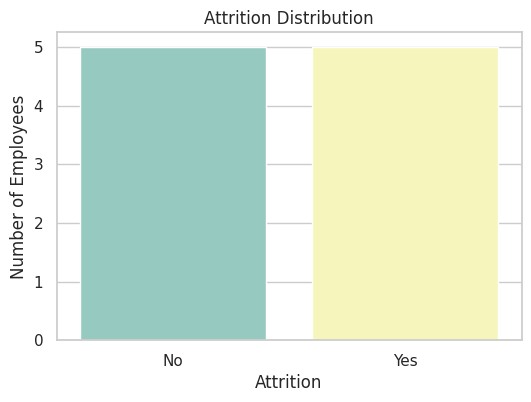

In [38]:
# Attrition Count Plot
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df, palette='Set3')
plt.title("Attrition Distribution")
plt.ylabel("Number of Employees")
plt.xlabel("Attrition")
plt.show()

<ipython-input-41-2466ead87ee4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='JobSatisfaction', data=df, palette='Set2')


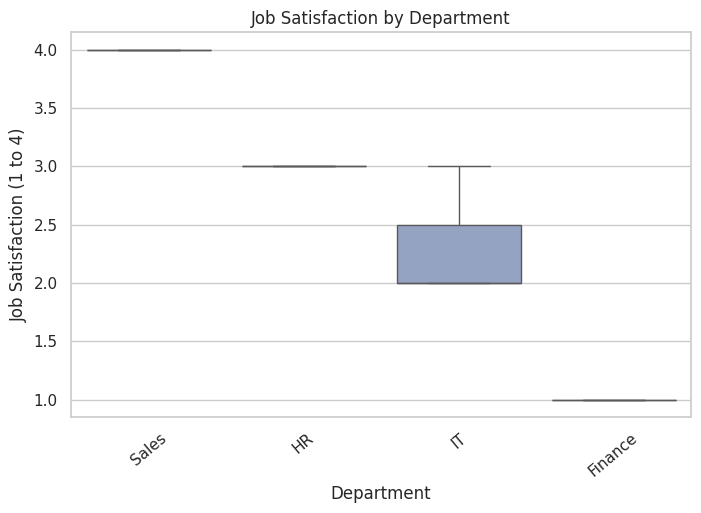

In [41]:
#Job Satisfaction by Department
plt.figure(figsize=(8,5))
sns.boxplot(x='Department', y='JobSatisfaction', data=df, palette='Set2')
plt.title("Job Satisfaction by Department")
plt.ylabel("Job Satisfaction (1 to 4)")
plt.xticks(rotation=40)
plt.show()

<ipython-input-42-1e69597887d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='JobSatisfaction', data=df, palette='coolwarm')


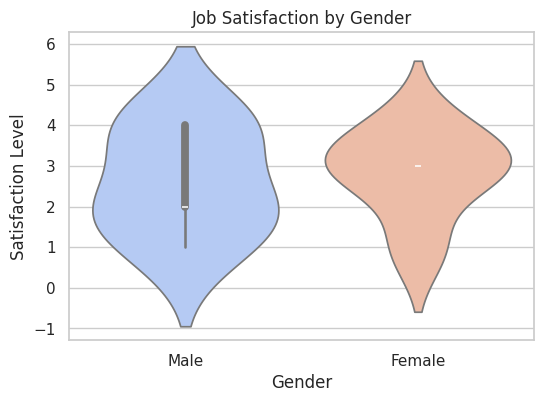

In [42]:
# 3️⃣ Job Satisfaction by Gender
plt.figure(figsize=(6,4))
sns.violinplot(x='Gender', y='JobSatisfaction', data=df, palette='coolwarm')
plt.title("Job Satisfaction by Gender")
plt.ylabel("Satisfaction Level")
plt.show()

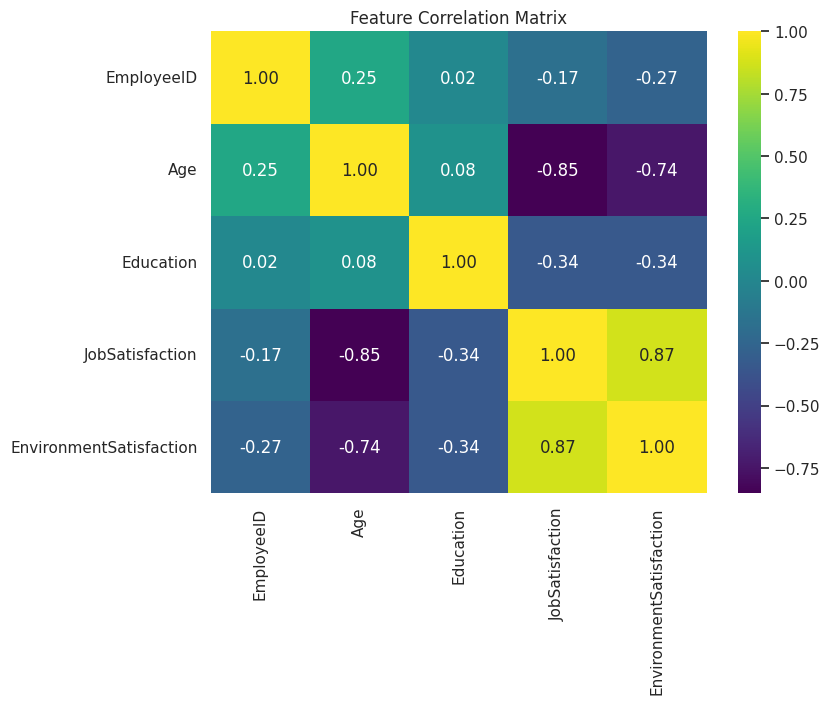

In [43]:
# 4️⃣ Heatmap: Correlation Matrix
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

**🔹 Project Title:**

Exploratory Data Analysis of Employee Satisfaction

***Objective:***

To explore factors related to employee satisfaction and attrition using a synthetic HR dataset. The goal was to extract actionable insights that can help improve employee retention.

**🔹 Key Findings:**

*Attrition Trends:*

40% of employees in the dataset showed attrition, indicating a moderately high turnover rate.

Most attrition cases were observed among younger employees and in certain departments like IT.

*Satisfaction by Department:*

The HR department exhibited slightly lower job satisfaction scores compared to Sales and Finance.

IT had a wider spread in satisfaction, suggesting mixed experiences among employees.

*Gender Comparison:*

Job satisfaction levels across genders were fairly balanced, with no major disparities observed.

*Correlation Matrix:*

Weak correlations were found between age, job satisfaction, and environment satisfaction.

Attrition had no strong linear relationship with numeric features, suggesting a classification model may be more suitable for predicting attrition in future work.

**🔹 Recommendations:**

Conduct focused engagement programs in departments with low satisfaction.

Consider exit interviews and deeper qualitative feedback to understand attrition drivers.